In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('Data/titanic_train.csv')

Taking a look at the dataset.

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


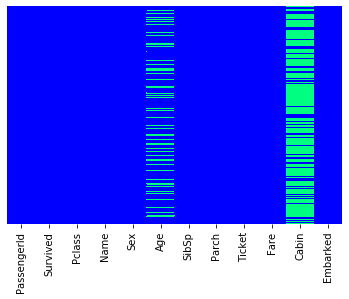

In [5]:
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='winter')

Removing the Name, Ticket and Cabin columns.

In [6]:
df = df.drop(['Name','Ticket','Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


Looking at how the ages are distributed per class.

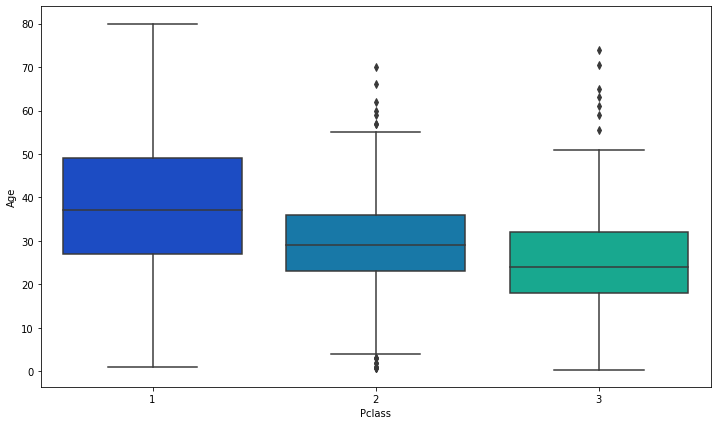

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In this example I will chose to replace the empty values of the column age by the median of the class instead of the median of the whole column, so we can compare the results with a different preparation of the dataset.

In [9]:
class1 = df['Pclass']==1
class2 = df['Pclass']==2
class3 = df['Pclass']==3
print(df[class1]['Age'].median())
print(df[class2]['Age'].median())
print(df[class3]['Age'].median())

37.0
29.0
24.0


In [10]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

df['Age']=df[['Age','Pclass']].apply(input_age,axis=1)
    

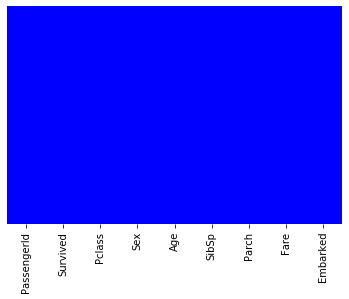

In [11]:
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='winter')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


Removing the 2 empty Embarked null values lines.

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.5+ KB


Transforming the text values into numerical.

In [15]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
svc = SVC()
X= df.drop('Survived',axis=1)
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred=svc.predict(X_test)
svc.score(X_train,y_train)

0.8311897106109325

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       170
           1       0.87      0.70      0.78        97

    accuracy                           0.85       267
   macro avg       0.86      0.82      0.83       267
weighted avg       0.86      0.85      0.85       267



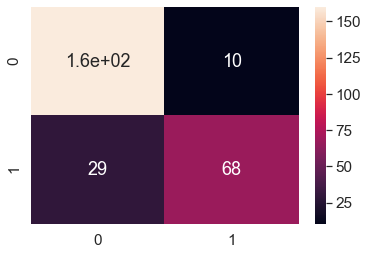

In [18]:
cm = confusion_matrix(y_test,y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={"size": 18})
print(classification_report(y_test, y_pred))

In [19]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)
y_predNB = NB.predict(X_test)
NB.score(X_train,y_train)

0.7733118971061094

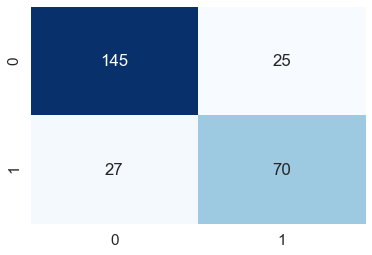

In [20]:
cfm = confusion_matrix(y_test,y_predNB)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [21]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       170
           1       0.74      0.72      0.73        97

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267

